In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jun  6 16:08:22 2023

@author: tpicard
"""

import pandas as pd
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import datetime
import netCDF4 as nc4

import datetime, numpy as np
import calendar
from datetime import timedelta
#%%% Correlation fct
from sklearn.linear_model import LinearRegression
#from tools_analyse import add_contour_per
from datetime import datetime
from cycler import cycler
import matplotlib as mpl
import random



import pandas as pd
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import datetime
import netCDF4 as nc

import datetime, numpy as np
import calendar
from datetime import timedelta
#%%% Correlation fct
from sklearn.linear_model import LinearRegression
from cycler import cycler
import matplotlib as mpl

def toTimestamp(d):
  return calendar.timegm(d.timetuple())
from datetime import datetime


plt.rcParams['lines.linewidth'] = 2
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
plt.rcParams['xtick.labelsize'] = 16  # Taille des ticks sur l'axe des x
plt.rcParams['ytick.labelsize'] = 16  # Taille des ticks sur l'axe des y
plt.rcParams['axes.titlesize'] = 16  # Taille du titre
plt.rcParams['axes.labelsize'] = 16  # Taille du label de l'axe des x
plt.rcParams['lines.markersize'] = 7
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = '20.0'
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.markeredgecolor'] = 'k'
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["teal", "crimson","k"]) 
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["darkgreen", "k","crimson","orange"]) 


/home2/datahome/tpicard/conda-env/croco/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Text(-80, 0.85, '2009 - 2019 (2011 and 2013 removed)')

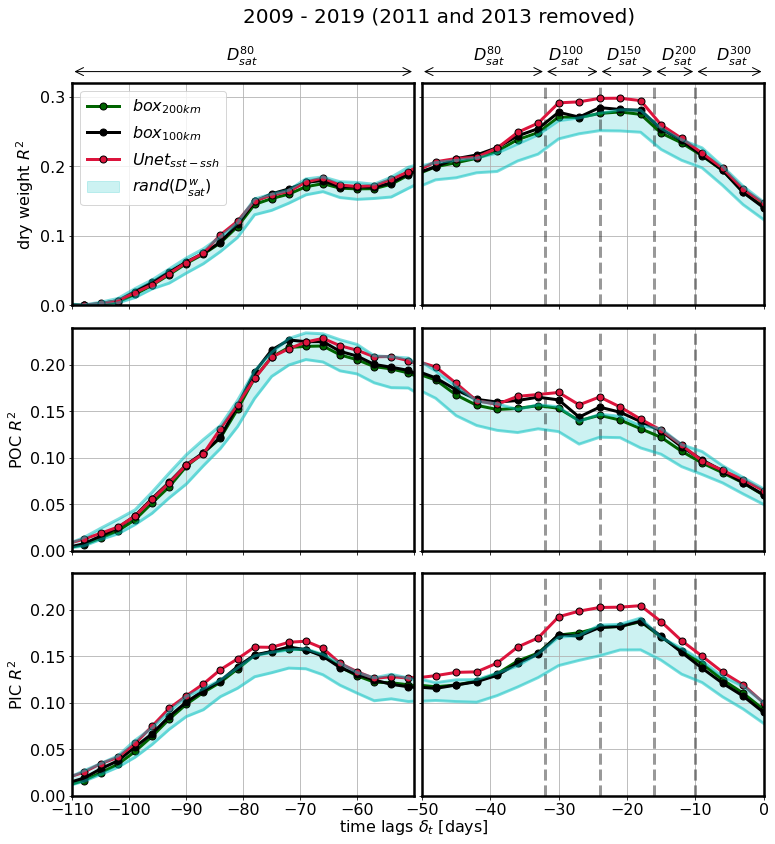

In [2]:

file = '/home2/datawork/tpicard/SPARO_V2/cross_corr/cc_2009_2020_no_2011_2013_j2_v2.nc'

    
def plot_cc(var_i,jmin,jmax):
    
    xlim=0.32


    nc = nc4.Dataset(file,'r')
    #dw_cc = np.asfortranarray(nc.variables['dry weight'])
    var_cc = np.asfortranarray(nc.variables[var_i])
    jlag_list = np.asfortranarray(nc.variables['lag_list'])
    nc.close()
    
    alpha_vlines=0.4
    plt.vlines(-10,0,xlim,linestyle='--',color='k',alpha=alpha_vlines)
    plt.vlines(-16,0,xlim,linestyle='--',color='k',alpha=alpha_vlines)
    plt.vlines(-24,0,xlim,linestyle='--',color='k',alpha=alpha_vlines)
    plt.vlines(-32,0,xlim,linestyle='--',color='k',alpha=alpha_vlines)
    
    regress_coef_list_pred=var_cc[:,0]
    regress_coef_list_box_100=var_cc[:,1]
    regress_coef_list_box_200=var_cc[:,2]
    regress_coef_list_pred_10_per=var_cc[:,3]
    regress_coef_list_pred_90_per=var_cc[:,4]
    plt.plot(jlag_list,regress_coef_list_box_200,label="$box_{200km}$",marker='o')
    plt.plot(jlag_list,regress_coef_list_box_100,label="$box_{100km}$",marker='o')
    plt.plot(jlag_list,regress_coef_list_pred,label="$Unet_{sst-ssh}$",marker='o')

    plt.plot(jlag_list,regress_coef_list_pred_10_per,alpha=0.5,color='c')
    plt.plot(jlag_list,regress_coef_list_pred_90_per,alpha=0.5,color='c')
    
    plt.fill_between(jlag_list,regress_coef_list_pred_10_per,regress_coef_list_pred_90_per,alpha=0.2,color='c',label="$rand(D_{sat}^{w})$",zorder=0)
    
    #plt.grid()

    if var_i != 'dry weight':
        xlim=0.24

    if var_i != 'PIC':
        plt.xticks(alpha=0)
        
    plt.xlim(jmin,jmax)
    plt.grid()
    plt.ylim(0,xlim)
    #print(regress_coef_list_pred)
    return


fig = plt.figure(figsize=(12,11))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.1, 
                    hspace=0.1)

gs = fig.add_gridspec(3, 8)


#mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
ax = fig.add_subplot(gs[0,4:])

harrow = 1.05
textsize = 16

ax.text(0.86,harrow+0.05,'$D^{300}_{sat}$', transform=ax.transAxes,size=textsize)
ax.text(0.68+0.02,harrow+0.05,'$D^{200}_{sat}$', transform=ax.transAxes,size=textsize)
ax.text(0.50+0.04,harrow+0.05,'$D^{150}_{sat}$', transform=ax.transAxes,size=textsize)
ax.text(0.33+0.04,harrow+0.05,'$D^{100}_{sat}$', transform=ax.transAxes,size=textsize)
ax.text(0.15,harrow+0.05,'$D^{80}_{sat}$', transform=ax.transAxes,size=textsize)

ax.annotate('', xy=(0.8, harrow), xycoords='axes fraction', xytext=(1, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

ax.annotate('', xy=(0.68, harrow), xycoords='axes fraction', xytext=(0.8, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

ax.annotate('', xy=(0.52, harrow), xycoords='axes fraction', xytext=(0.68, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

ax.annotate('', xy=(0.36, harrow), xycoords='axes fraction', xytext=(0.52, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

ax.annotate('', xy=(0, harrow), xycoords='axes fraction', xytext=(0.36, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

jmin=-50
jmax=0

plot_cc('dry weight',jmin,jmax)
plt.yticks(alpha=0)
props = dict(boxstyle='round', facecolor='white', alpha=1)
# place a text box in upper left in axes coords


ax2 = fig.add_subplot(gs[1,4:])
plot_cc('POC',jmin,jmax)
plt.yticks(alpha=0)

ax3 = fig.add_subplot(gs[2,4:])
plot_cc('PIC',jmin,jmax)
plt.yticks(alpha=0)

jmin=-110
jmax=-50

ax = fig.add_subplot(gs[0,0:4])
ax.text(0.45,harrow+0.05,'$D^{80}_{sat}$', transform=ax.transAxes,size=textsize)
ax.annotate('', xy=(0, harrow), xycoords='axes fraction', xytext=(1, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))


plot_cc('dry weight',jmin,jmax)
plt.ylabel("dry weight $R^2$")

plt.legend(prop={'size': 16},loc=2)

ax = fig.add_subplot(gs[1,0:4])
plt.ylabel("POC $R^2$")

plot_cc('POC',jmin,jmax)

ax = fig.add_subplot(gs[2,0:4])
plt.ylabel("PIC $R^2$")
plt.xlabel("time lags $\delta_t$ [days]")
plt.xticks([-120,-110,-100,-90,-80,-70,-60])
ax.xaxis.set_label_coords(1, -0.1)

plot_cc('PIC',jmin,jmax)

#props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(-80, 0.85, "2009 - 2019 (2011 and 2013 removed)", fontsize=20,
        verticalalignment='top',zorder=100,color='k')

#plt.savefig("cross_correlation_2009_2019_no_2011_2013.png",dpi=300,bbox_inches='tight',facecolor="white")


In [3]:

    
lim_w300 = 12
lim_w200 = 18
lim_w150 = 25
lim_w100 = 34

def plot_cc(var_i,jmin,jmax):
    
    xlim=0.32


    nc = nc4.Dataset(file,'r')
    #dw_cc = np.asfortranarray(nc.variables['dry weight'])
    var_cc = np.asfortranarray(nc.variables[var_i])
    jlag_list = np.asfortranarray(nc.variables['lag_list'])
    nc.close()
    
    alpha_vlines=0.4
    plt.vlines(-lim_w300,0,xlim,linestyle='--',color='k',alpha=alpha_vlines)
    plt.vlines(-lim_w200,0,xlim,linestyle='--',color='k',alpha=alpha_vlines)
    plt.vlines(-lim_w150,0,xlim,linestyle='--',color='k',alpha=alpha_vlines)
    plt.vlines(-lim_w100,0,xlim,linestyle='--',color='k',alpha=alpha_vlines)
    
    regress_coef_list_pred=var_cc[:,0]
    regress_coef_list_box_100=var_cc[:,1]
    regress_coef_list_box_200=var_cc[:,2]
    regress_coef_list_pred_10_per=var_cc[:,3]
    regress_coef_list_pred_90_per=var_cc[:,4]
    plt.plot(jlag_list,regress_coef_list_box_200,label="$box_{200km}$",marker='o')
    plt.plot(jlag_list,regress_coef_list_box_100,label="$box_{100km}$",marker='o')
    plt.plot(jlag_list,regress_coef_list_pred,label="$Unet_{sst-ssh}$",marker='o')
    plt.plot(jlag_list,regress_coef_list_pred_10_per,alpha=0.5,color='c')
    plt.plot(jlag_list,regress_coef_list_pred_90_per,alpha=0.5,color='c')
    plt.fill_between(jlag_list,regress_coef_list_pred_10_per,regress_coef_list_pred_90_per,alpha=0.2,color='c',label="$rand(D_{sat}^{w})$",zorder=0)
    
    #plt.grid()

    if var_i != 'dry weight':
        xlim=0.24

    if var_i != 'PIC':
        plt.xticks(alpha=0)
        
    plt.xlim(jmin,jmax)
    plt.grid()
    plt.ylim(0,xlim)
    #print(regress_coef_list_pred)
    return


NameError: name 'mtransforms' is not defined

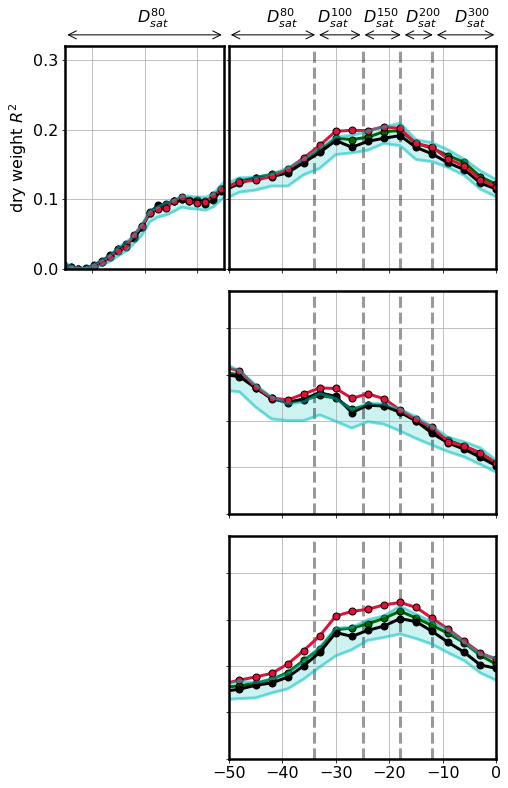

In [4]:


file = '/home2/datawork/tpicard/SPARO_V2/cross_corr/cc_2009_2020_j2_v2.nc'


fig = plt.figure(figsize=(8*2,11))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.1, 
                    hspace=0.1)

gs = fig.add_gridspec(3, 8*2+1)


#mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
ax = fig.add_subplot(gs[0,3:8])

harrow = 1.05
textsize = 16

ax.text(0.84,harrow+0.05,'$D^{300}_{sat}$', transform=ax.transAxes,size=textsize)
ax.text(0.66,harrow+0.05,'$D^{200}_{sat}$', transform=ax.transAxes,size=textsize)
ax.text(0.50+0.0,harrow+0.05,'$D^{150}_{sat}$', transform=ax.transAxes,size=textsize)
ax.text(0.33+0.0,harrow+0.05,'$D^{100}_{sat}$', transform=ax.transAxes,size=textsize)
ax.text(0.14,harrow+0.05,'$D^{80}_{sat}$', transform=ax.transAxes,size=textsize)

ax.annotate('', xy=(0.77, harrow), xycoords='axes fraction', xytext=(1, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

ax.annotate('', xy=(0.65, harrow), xycoords='axes fraction', xytext=(0.77, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

ax.annotate('', xy=(0.50, harrow), xycoords='axes fraction', xytext=(0.65, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

ax.annotate('', xy=(0.33, harrow), xycoords='axes fraction', xytext=(0.50, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

ax.annotate('', xy=(0, harrow), xycoords='axes fraction', xytext=(0.33, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

jmin=-50
jmax=0

plot_cc('dry weight',jmin,jmax)
plt.yticks(alpha=0)
props = dict(boxstyle='round', facecolor='white', alpha=1)
# place a text box in upper left in axes coords


ax2 = fig.add_subplot(gs[1,3:8])
plot_cc('POC',jmin,jmax)
plt.yticks(alpha=0)

ax3 = fig.add_subplot(gs[2,3:8])
plot_cc('PIC',jmin,jmax)
plt.yticks(alpha=0)

plt.xticks([-50,-40,-30,-20,-10,0])

jmin=-110
jmax=-50

ax = fig.add_subplot(gs[0,0:3])
ax.text(0.45,harrow+0.05,'$D^{80}_{sat}$', transform=ax.transAxes,size=textsize)
ax.annotate('', xy=(0, harrow), xycoords='axes fraction', xytext=(1, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))


plot_cc('dry weight',jmin,jmax)
plt.ylabel("dry weight $R^2$")

label = 'a'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0, 1.21, label, transform=ax.transAxes + trans,
        fontsize=20, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))


plt.legend(prop={'size': 16},loc=2)

ax = fig.add_subplot(gs[1,0:3])
plt.ylabel("POC $R^2$")

plot_cc('POC',jmin,jmax)

ax = fig.add_subplot(gs[2,0:3])
plt.ylabel("PIC $R^2$")
plt.xlabel("time lags (-$\delta_t$) [days]")
plt.xticks([-110,-90,-70])
ax.xaxis.set_label_coords(1.4, -0.12)

plot_cc('PIC',jmin,jmax)

#plt.text(-55, 0.85, "2009 - 2019", fontsize=20,
#        verticalalignment='top',zorder=100,color='k')


file = '/home2/datawork/tpicard/SPARO_V2/cross_corr/cc_2009_2020_no_2011_2013_j2_v2.nc'

ax = fig.add_subplot(gs[0,9+3:])


harrow = 1.05
textsize = 16

"""
ax.text(0.84,harrow+0.05,'$D^{300}_{sat}$', transform=ax.transAxes,size=textsize)
ax.text(0.66,harrow+0.05,'$D^{200}_{sat}$', transform=ax.transAxes,size=textsize)
ax.text(0.50+0.0,harrow+0.05,'$D^{150}_{sat}$', transform=ax.transAxes,size=textsize)
ax.text(0.33+0.0,harrow+0.05,'$D^{100}_{sat}$', transform=ax.transAxes,size=textsize)
ax.text(0.14,harrow+0.05,'$D^{80}_{sat}$', transform=ax.transAxes,size=textsize)

ax.annotate('', xy=(0.77, harrow), xycoords='axes fraction', xytext=(1, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

ax.annotate('', xy=(0.65, harrow), xycoords='axes fraction', xytext=(0.77, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

ax.annotate('', xy=(0.50, harrow), xycoords='axes fraction', xytext=(0.65, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

ax.annotate('', xy=(0.33, harrow), xycoords='axes fraction', xytext=(0.50, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

ax.annotate('', xy=(0, harrow), xycoords='axes fraction', xytext=(0.33, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))
"""

jmin=-50
jmax=0

plot_cc('dry weight',jmin,jmax)
plt.yticks(alpha=0)
props = dict(boxstyle='round', facecolor='white', alpha=1)
# place a text box in upper left in axes coords


ax2 = fig.add_subplot(gs[1,9+3:])
plot_cc('POC',jmin,jmax)
plt.yticks(alpha=0)

ax3 = fig.add_subplot(gs[2,9+3:])
plot_cc('PIC',jmin,jmax)
plt.yticks(alpha=0)

plt.xticks([-50,-40,-30,-20,-10,0])


jmin=-110
jmax=-50

ax = fig.add_subplot(gs[0,9:9+3])

label = 'b'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0, 1.21, label, transform=ax.transAxes + trans,
        fontsize=20, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

"""
ax.text(0.45,harrow+0.05,'$D^{80}_{sat}$', transform=ax.transAxes,size=textsize)
ax.annotate('', xy=(0, harrow), xycoords='axes fraction', xytext=(1, harrow), 
            arrowprops=dict(arrowstyle="<->", color='k'))

"""

plot_cc('dry weight',jmin,jmax)

#plt.ylabel("dry weight $R^2$")

#plt.legend(prop={'size': 16},loc=2)

ax = fig.add_subplot(gs[1,9:9+3])
#plt.ylabel("POC $R^2$")

plot_cc('POC',jmin,jmax)

ax = fig.add_subplot(gs[2,9:9+3])
#plt.ylabel("PIC $R^2$")
plt.xlabel("time lags (-$\delta_t$) [days]")
plt.xticks([-110,-90,-70])
ax.xaxis.set_label_coords(1.4, -0.12)

plot_cc('PIC',jmin,jmax)


#props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(-75, 0.8, "2011 and 2013 removed", fontsize=20,
        verticalalignment='top',zorder=100,color='k')

#plt.savefig("cross_correlation_final.png",dpi=300,bbox_inches='tight',facecolor="white")